****simple linear regression step by step****


In [39]:
#import liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df=pd.read_csv("C:\codes\data_science\Data_sciece_udmey\datasets\height-weight.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rohit\AppData\Local\Temp\ipykernel_27592\2027641610.py:1: SyntaxWarning: invalid escape sequence '\c'
  df=pd.read_csv("C:\codes\data_science\Data_sciece_udmey\datasets\height-weight.csv")


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [42]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [43]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Height')

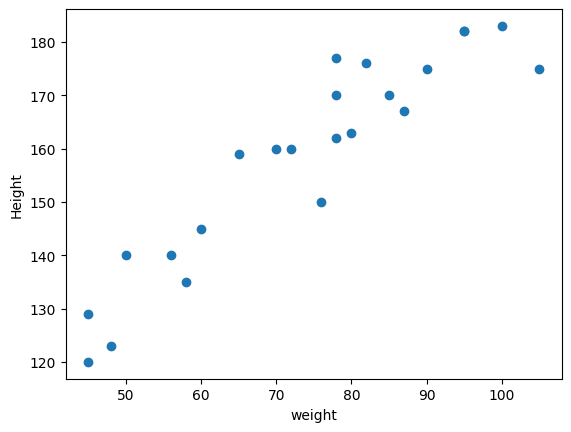

In [44]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("Height")

In [45]:
### defining dependand and independant features 
X=df[["Weight"]]
Y=df[["Height"]]
Y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)


In [47]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
X_train=scaler.fit_transform(xtrain)
X_test=scaler.transform(xtest)

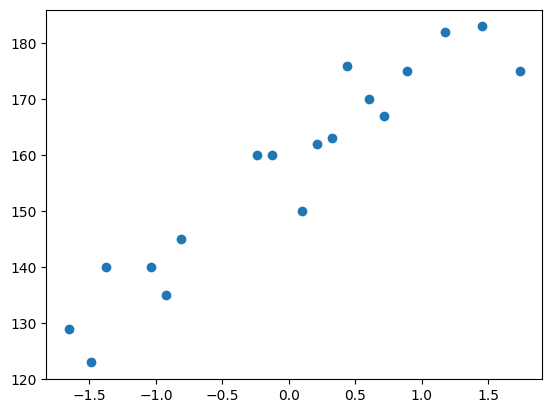

In [50]:
plt.scatter(X_train,ytrain)

In [51]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,ytrain)

LinearRegression()

In [52]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [[17.03440872]]
Intercept: [157.5]


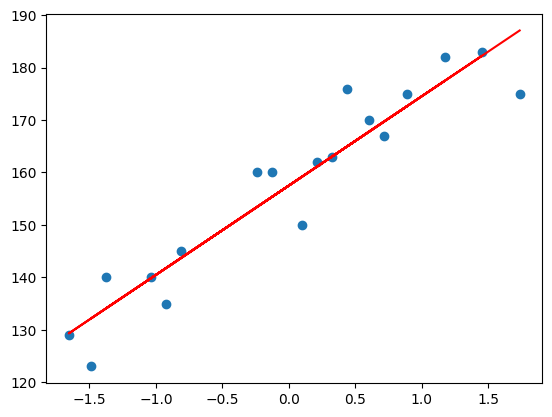

In [53]:
plt.scatter(X_train,ytrain)
plt.plot(X_train,regressor.predict(X_train),'r')

In [54]:
input_scaled = scaler.transform([[80]])
regressor.predict(input_scaled)

c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[163.01076266]])

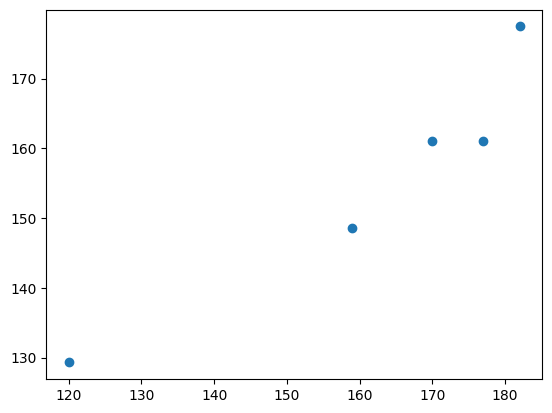

In [55]:
y_pred_test=regressor.predict(X_test)

plt.scatter(ytest,y_pred_test)

In [57]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [[17.03440872]]
Intercept: [157.5]


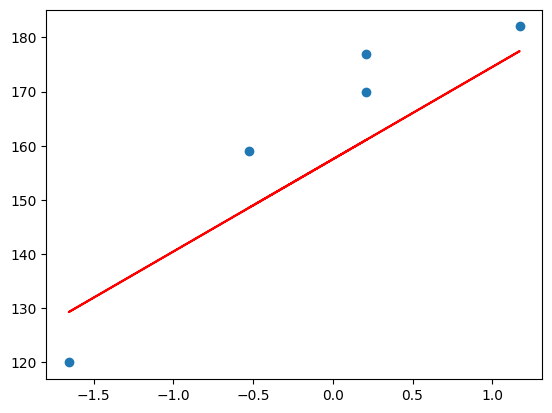

In [58]:
plt.scatter(X_test,ytest)
plt.plot(X_test,regressor.predict(X_test),'r')

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [60]:
mse=mean_squared_error(ytest,y_pred_test)
mae=mean_absolute_error(ytest,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [62]:
from sklearn.metrics import r2_score
score=r2_score(ytest,y_pred_test)
score

0.776986986042344

In [64]:

#adjusted r2 score 

1 - (1-score)*(len(ytest)-1)/(len(ytest)-X_test.shape[1]-1)

0.7026493147231252

In [65]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [66]:
residuals=ytest-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


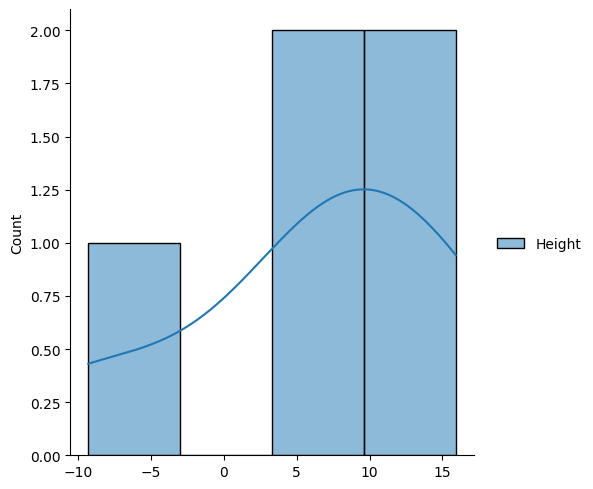

In [68]:
## plot this residuals
import seaborn as sns
sns.displot(residuals,kde=True)